จำแนกกลุ่มลูกค้าเป็นกลุ่มๆ

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

# Customers Segmentation

# RFM Analysis

**What is RFM?**

Behavioral segmentation by 3 important features:


* **Recency** — number of days since the last purchase | ครั้งล่าสุดที่มาใช้บริการ(วัน)
* **Frequency** — number of transactions made over a given period | จำนวนครั้งการใช้บริการกี่ครั้งที่ผ่านมา
* **Monetary** — amount spent over a given period of time | มูลค่าทั้งหมดที่ผ่านมา





หลังจาก RFM
* **Feature engineering** การแปลง feature หรือสร้าง feature ใหม่ขึ้นมา เช่น มีวันเกิด สร้างfeature อายุขึ้นมมา
* **12 critiria** จัดกลุ่มลูกค้าตามเกณฑ์ 12 เกณฑ์

##load data

In [2]:
#https://drive.google.com/file/d/1HDE8owM6n4LAPa7h8igkPOzyCdco2vCe/view?usp=drive_link
# !gdown --id 1HDE8owM6n4LAPa7h8igkPOzyCdco2vCe

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Read dataset
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom


##clean data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Convert InvoiceDate from object into datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(str)

In [6]:
# Drop NA values from online
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  object        
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.1+ MB


##Feature Engineering

In [8]:
# Create TotalSum column for online dataset
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
# --Group data by customerID--

# Create snapshot date
# + timedelta(days=1) day ตามวันที่วิเคราะห์-วันที่เก็บข้อมูลล่าสุด
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

# Grouping by CustomerID
data_process = df.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

# Rename the columns
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Print top 5 rows and shape of dataframe
print(data_process.shape)
data_process.head()

2011-12-10 12:50:00
(4373, 3)


,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,"4,310.00"
12348.0,75,31,"1,797.24"
12349.0,19,73,"1,757.55"
12350.0,310,17,334.40


## Plot RFM distributions

C:\Users\gotxz\AppData\Local\Temp\ipykernel_3288\3319262465.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
C:\Users\gotxz\AppData\Local\Temp\ipykernel_3288\3319262465.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(dat

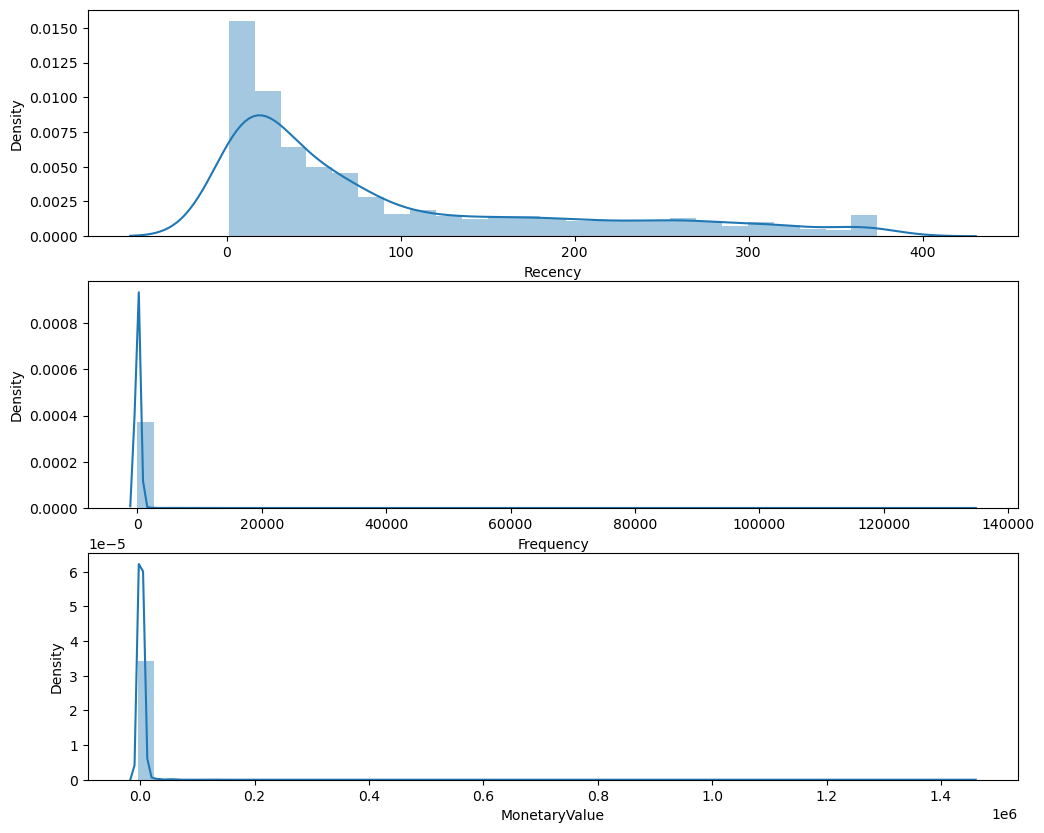

In [10]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])

# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])

# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])

# Show the plot
plt.show()

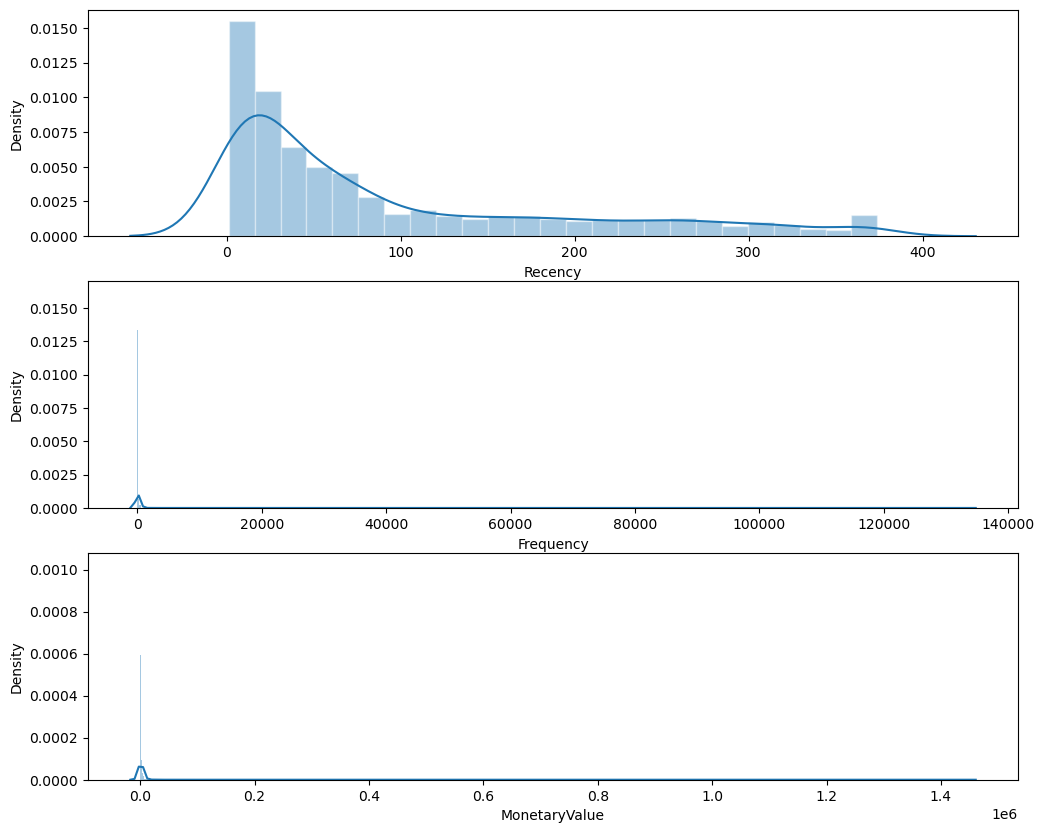

In [11]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of R
#plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
plt.subplot(3, 1, 1);
sns.histplot(data_process['Recency'], kde=True,stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))


# Plot distribution of F
#plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
plt.subplot(3, 1, 2);
sns.histplot(data_process['Frequency'], kde=True,stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

# Plot distribution of M
#plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
plt.subplot(3, 1, 3);
sns.histplot(data_process['MonetaryValue'], kde=True,stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

# Show the plot
plt.show()

## Segment by RMF Analysis

[pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)



In [12]:
# Create labels for R, F, M
r_labels = range(4, 0, -1) #[4,3,2,1] เรียงจาก ดีมาก ไปดีน้อย
f_labels = range(1, 5 )#[1,2,3,4]
m_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)

# Create new columns R, F, M
data_process = data_process.assign(R = r_groups.values,
                                   F = f_groups.values,
                                   M = m_groups.values)
data_process.head()

# Create RFM dataframe
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,"4,310.00",4,4,4
12348.0,75,31,"1,797.24",2,2,4
12349.0,19,73,"1,757.55",3,3,4
12350.0,310,17,334.40,1,1,2


In [13]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,3
12347.0,2,182,"4,310.00",4,4,4,12
12348.0,75,31,"1,797.24",2,2,4,8
12349.0,19,73,"1,757.55",3,3,4,10
12350.0,310,17,334.40,1,1,2,4


### Define segment names 7 group

* **Potential** — high potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!

* **Promising** — showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.

* **Needs Attention** — made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.

* **Require Activation** — Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

In [14]:
# Define RFM level
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)

# Print the top 5 rows
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,3,Require Activation
12347.0,2,182,"4,310.00",4,4,4,12,Can't Loose Them
12348.0,75,31,"1,797.24",2,2,4,8,Champions
12349.0,19,73,"1,757.55",3,3,4,10,Can't Loose Them
12350.0,310,17,334.40,1,1,2,4,Needs Attention


In [15]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Pring the aggregate data
rfm_level_agg


Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them     25.20    274.10      4,986.00  1690
Champions            62.80     57.10        976.80   467
Loyal                78.80     39.70        724.00   448
Needs Attention     174.40     13.90        227.30   392
Potential            94.30     28.50        491.80   468
Promising           153.10     21.20        346.90   516
Require Activation  264.80      7.80        109.10   392

### plot tree map

In [16]:
# Change column name
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns =['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_level_agg

,RecencyMean,FrequencyMean,MonetaryMean,Count
RFM_Level,,,,
Can't Loose Them,25.20,274.10,"4,986.00",1690
Champions,62.80,57.10,976.80,467
Loyal,78.80,39.70,724.00,448
Needs Attention,174.40,13.90,227.30,392
Potential,94.30,28.50,491.80,468
Promising,153.10,21.20,346.90,516
Require Activation,264.80,7.80,109.10,392


In [17]:
# !pip install squarify
import squarify

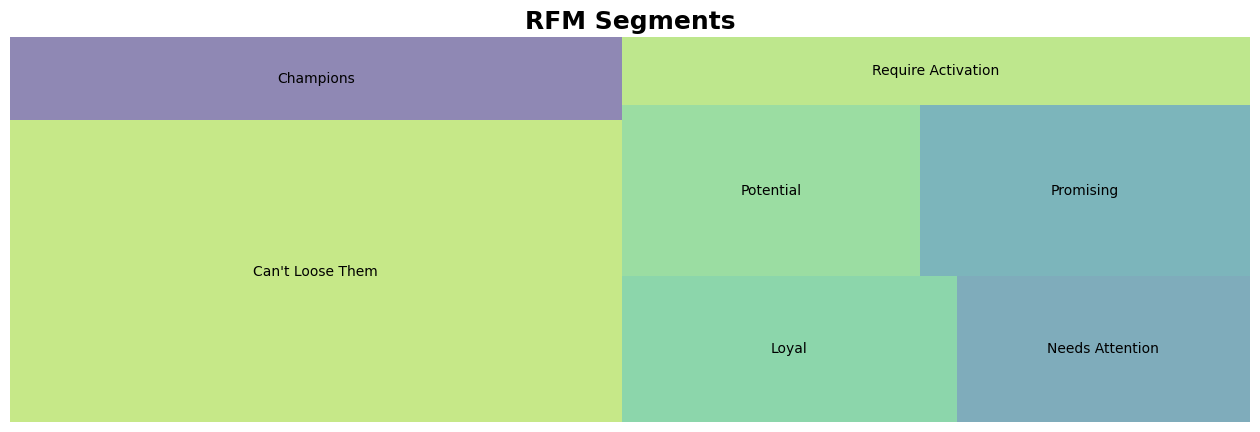

In [18]:
# Plot using Squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 5)
squarify.plot(sizes=rfm_level_agg['Count'],
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential',
                     'Promising',
                     'Require Activation'], alpha=.6)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# Use Machine Learning in Customer Segmentation

#### นำมาประยุกต์ กับ ML โดยใช้ unsuppervise leanring เช่น (clustering(k-mean))

# K-Means Clustering

[KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

## load data

In [19]:
#https://drive.google.com/file/d/1tuYoSQxg-isoWzhKonrpVNEcrbJbZRSJ/view?usp=sharing
# !gdown --id 1tuYoSQxg-isoWzhKonrpVNEcrbJbZRSJ

In [20]:
# Read dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## prepare data

In [21]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

df_encoded.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0.00,1.00
1,2,21,15,81,0.00,1.00
2,3,20,16,6,1.00,0.00
3,4,23,16,77,1.00,0.00
4,5,31,17,40,1.00,0.00


In [22]:
#drop CustomerID  from df_encoded

df_encoded = df_encoded.drop('CustomerID', axis=1)
df_encoded.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0.00,1.00
1,21,15,81,0.00,1.00
2,20,16,6,1.00,0.00
3,23,16,77,1.00,0.00
4,31,17,40,1.00,0.00


## train K-means

In [23]:
#example for 2 dimension
X = df_encoded.iloc[:,[1,2]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [24]:
from sklearn.cluster import KMeans

#define number of cluster
nCluster = 2

#fit k-means
kmeans = KMeans(n_clusters=nCluster, random_state=0, n_init="auto").fit(X)
kmeans.labels_

c:\Users\gotxz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [25]:
#predict
y = kmeans.predict(X)
print(y)

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


##Plotting all clusters and their centroid

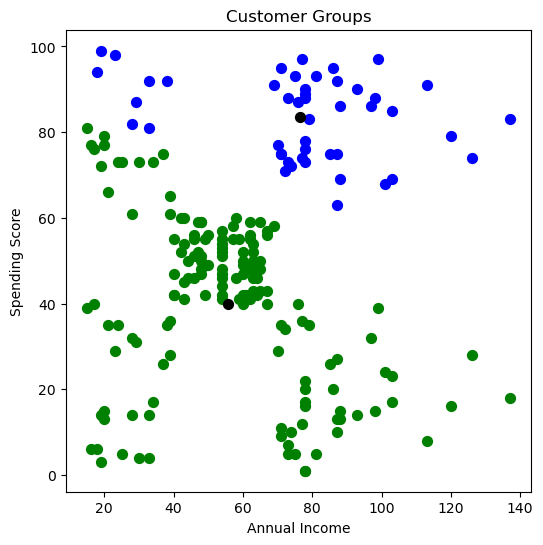

In [26]:
# Plotting all the clusters
plt.figure(figsize=(6,6))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='blue', label='Cluster 2')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Choosing the optimum number of Clusters

Finding WCSS value for different number of clusters

In [27]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', n_init="auto", random_state = 42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

c:\Users\gotxz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gotxz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gotxz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gotxz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

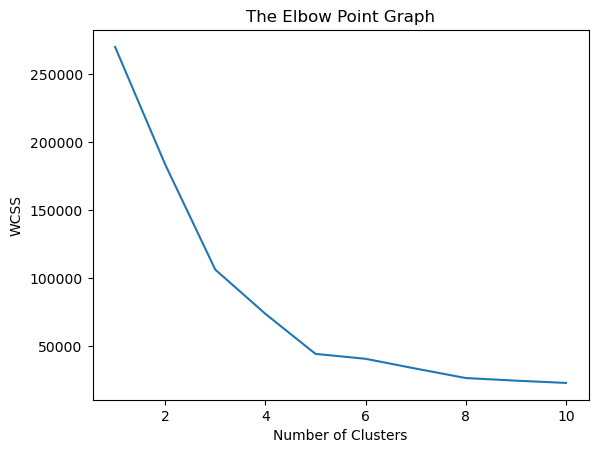

In [28]:
#Plotting elbow graph
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
'''
Optimum Number of clusters from the elbow plot = 5
Training the K-Means Clustering model with 5 clusters
'''

#define number of cluster
nCluster = 5

#fit k-means
kmeans = KMeans(n_clusters=nCluster, random_state=0, n_init="auto").fit(X)

y = kmeans.predict(X)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


c:\Users\gotxz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

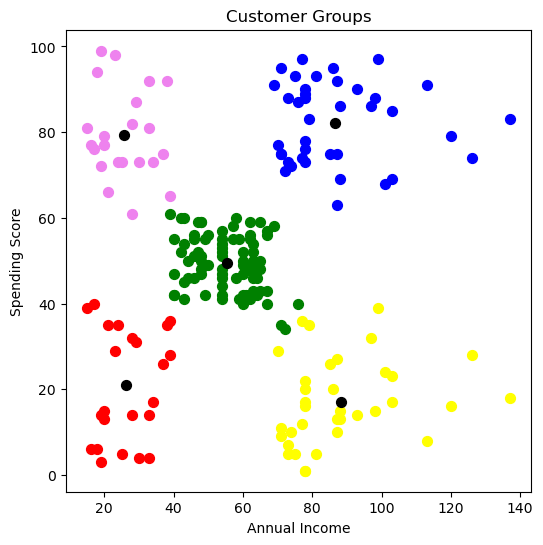

In [31]:
# Plotting all the clusters
plt.figure(figsize=(6,6))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='red', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='violet', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [32]:
#new data
kmeans.predict([[90,100]])

array([1])

**การบ้านนำ** 
### RFM มาใช้กับ K-mean

In [105]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dropna(inplace=True)
df['CustomerID'] = df['CustomerID'].astype(str)



In [107]:
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

In [108]:
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

data_process = df.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

data_process.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)


In [109]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5 )
m_labels = range(1, 5)

r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)

data_process = data_process.assign(R = r_groups.values,
                                   F = f_groups.values,
                                   M = m_groups.values)

rfm = data_process

In [110]:
rfm

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,"4,310.00",4,4,4
12348.0,75,31,"1,797.24",2,2,4
12349.0,19,73,"1,757.55",3,3,4
12350.0,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_rfm = pd.DataFrame(scaler.fit_transform(rfm), columns=rfm.columns)

In [114]:
scaled_rfm_full = scaled_rfm
scaled_rfm_noscored = scaled_rfm.iloc[:,:3]
scaled_rfm_scored = scaled_rfm.iloc[:,3:]

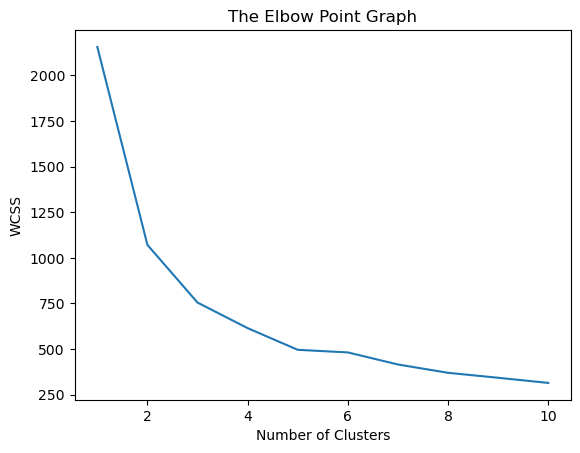

In [118]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', n_init="auto", random_state = 42)
    kmeans.fit(scaled_rfm_full)

    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

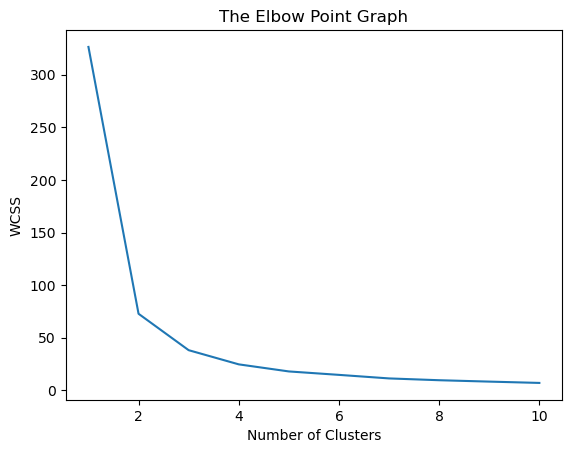

In [119]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', n_init="auto", random_state = 42)
    kmeans.fit(scaled_rfm_noscored)

    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

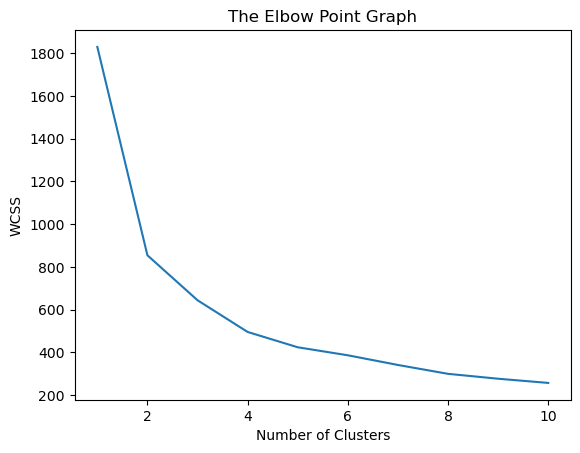

In [120]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', n_init="auto", random_state = 42)
    kmeans.fit(scaled_rfm_scored)

    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### จาก elbow method จะเห็นจุด elbow point ของข้อมูลก่อนทำ RMF analysis ได้ชัดกว่าข้อมูลอื่น จึงเลือกข้อมูลชุดนี้มา

In [121]:
scaled_rfm_noscored

,Recency,Frequency,MonetaryValue
0,0.87,0.00,0.02
1,0.00,0.02,0.03
2,0.20,0.00,0.02
3,0.05,0.01,0.02
4,0.83,0.00,0.02
...,...,...,...
4367,0.74,0.00,0.02
4368,0.48,0.00,0.02
4369,0.02,0.00,0.02
4370,0.01,0.09,0.02


In [124]:
nCluster = 2

kmeans = KMeans(n_clusters=nCluster, random_state=0, n_init="auto")
kmeans.fit(scaled_rfm_noscored)

y = kmeans.predict(scaled_rfm_noscored)

In [125]:
y

array([0, 1, 1, ..., 1, 1, 1])

In [126]:
kmeans.cluster_centers_

array([[0.66523284, 0.00354035, 0.01679626],
       [0.10644123, 0.01414495, 0.02343439]])